In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
## Import clustering results
kmeans_results = pd.read_csv("kmeans_results_scaled.csv")

## These are previous/alternative results
hdb_5 = pd.read_csv("hdb_results_5s.csv")
hdb_100 = pd.read_csv("hdb_results_100.csv")
hdb_noeps = pd.read_csv("hdb_results_100noeps.csv")
hdb_subset = pd.read_csv("hdb_results_subset100.csv")

### KMeans Analysis

In [57]:
kmeans_results.head()

,mmsi,occ_num,net_name,mmsi_length,spawn_offshore,spoof,speed_0,speed_med,speed_99,speed_std,...,x_med,x_99,x_std,y_0,y_med,y_99,y_std,red_flags,entries,cluster
0,0,1,False,True,False,False,0.0,0.0,0.0,0.000000,...,0.133253,0.133253,0.000000,0.651053,0.651053,0.651053,0.000000,1,5,3
1,0,2,True,True,True,False,4.2,6.9,9.6,3.818377,...,0.059676,0.081572,0.030965,0.699434,0.835477,0.971519,0.192393,3,2,1
2,0,3,False,True,True,False,0.0,0.0,0.0,0.000000,...,0.069601,0.069601,0.000000,0.200804,0.200804,0.200804,0.000000,2,4,3
3,0,4,False,True,True,True,0.0,0.0,0.0,0.000000,...,0.133253,0.133253,0.036749,0.200814,0.651043,0.651053,0.259943,3,3,3
4,0,5,True,True,True,True,0.0,6.8,7.7,2.893832,...,0.397178,0.401358,0.091522,0.200814,0.918348,0.969039,0.239350,4,30,1


In [59]:
## Showing breakdown of flags per cluster
flag_by_clust = pd.DataFrame(kmeans_results.groupby('cluster').red_flags.value_counts(normalize=True))
flag_by_clust

proportion
cluster red_flags            
0       1            0.761340
        0            0.221087
        2            0.017164
        3            0.000409
1       1            0.458982
        0            0.259247
        2            0.249071
        3            0.031554
        4            0.001146
2       1            1.000000
3       1            0.363700
        2            0.331613
        0            0.215461
        3            0.088019
        4            0.001207
4       0            0.474100
        1            0.425855
        2            0.099334
        3            0.000622
        4            0.000089

In [60]:
flag_by_clust = flag_by_clust.reset_index()

<Axes: xlabel='cluster', ylabel='proportion'>

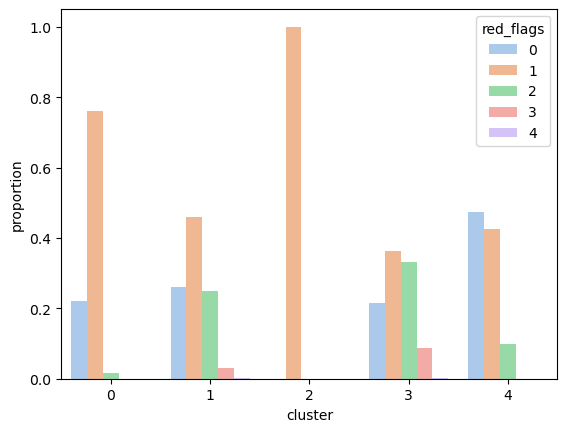

In [61]:
## Showing breakdown of flags per cluster
sns.barplot(flag_by_clust, x="cluster", y="proportion", hue="red_flags")


In [69]:
## Showing variational density of each cluster by whether they have a good or bad name
name_by_clust = pd.DataFrame(kmeans_results.groupby('cluster').net_name.value_counts(normalize = False))
name_by_clust = name_by_clust.reset_index()
name_by_clust

,cluster,net_name,count
0,0,False,2420
1,0,True,27
2,1,False,43183
3,1,True,7429
4,2,False,3
5,3,False,99374
6,3,True,53865
7,4,False,11214
8,4,True,41


<Axes: xlabel='cluster', ylabel='proportion'>

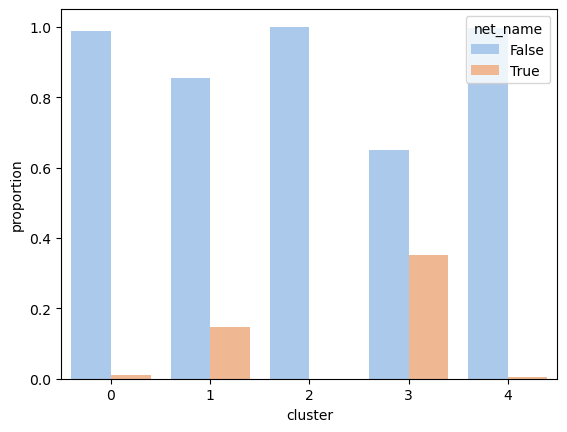

In [63]:
## Showing cluster break down by bad vessel name
sns.barplot(name_by_clust, x="cluster", y="proportion", hue="net_name")

<Axes: xlabel='net_name', ylabel='red_flags'>

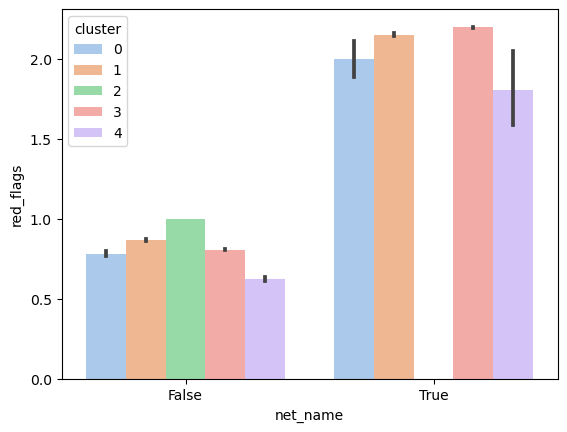

In [64]:
sns.barplot(kmeans_results, x="net_name", y="red_flags", hue="cluster")

In [65]:
kmeans_results.net_name.value_counts()

net_name
False    156194
True      61362
Name: count, dtype: int64

In [66]:
kmeans_results.red_flags.value_counts()

red_flags
1    85622
2    64582
0    52015
3    15093
4      244
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='red_flags'>

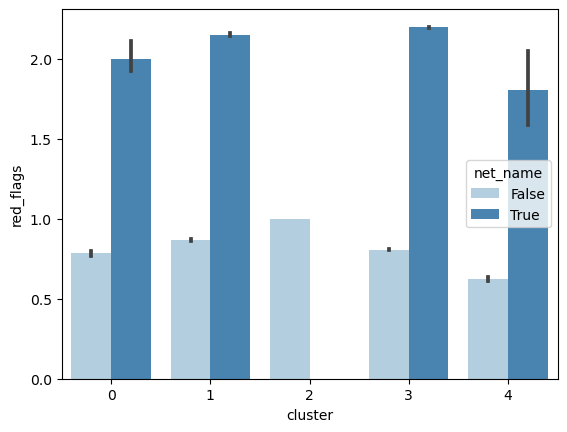

In [67]:
sns.barplot(x = 'cluster',
            y = 'red_flags',
            hue = 'net_name',
            data = kmeans_results,
            palette = "Blues")

### HDBSCAN ANALYSIS

In [ ]:
## Alternative Attempts for reference
hdb_5 = pd.read_csv("hdb_results_5s.csv") #constructed with 5 min cluster size and .5 epsilon
hdb_100 = pd.read_csv("hdb_results_100.csv") #constructed with 100 min cluster size and .5 epsilon
hdb_noeps = pd.read_csv("hdb_results_100noeps.csv") #constructed with 100 min cluster and no epsilon
hdb_subset = pd.read_csv("hdb_results_subset100.csv") #constructed with mmsi, spoof, and spawn as included features


In [3]:
## These are the HDBSCAN cluster results used 
hdb_new = pd.read_csv("hdb_results_5new.csv")

In [ ]:
# Analysis from alternative results

<Axes: xlabel='cluster', ylabel='proportion'>

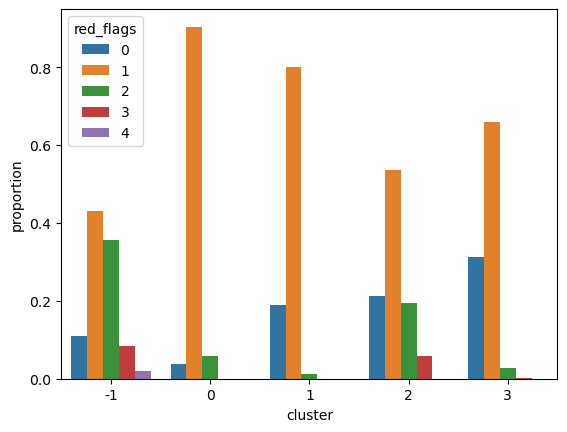

In [21]:

hdb1 = pd.DataFrame(hdb_100.groupby('cluster').red_flags.value_counts(normalize=True))
hdb1 = hdb1.reset_index()
sns.barplot(hdb1, x="cluster", y="proportion", hue="red_flags")


<Axes: xlabel='cluster', ylabel='proportion'>

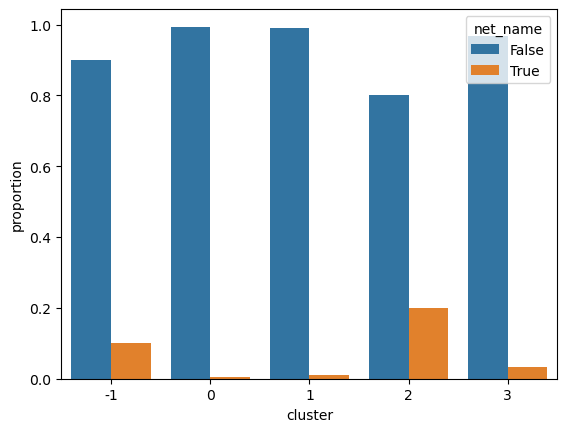

In [22]:
hdb1_nets = pd.DataFrame(hdb_100.groupby('cluster').net_name.value_counts(normalize = True))
hdb1_nets = hdb1_nets.reset_index()
sns.barplot(hdb1_nets, x="cluster", y="proportion", hue="net_name")

<Axes: xlabel='net_name', ylabel='red_flags'>

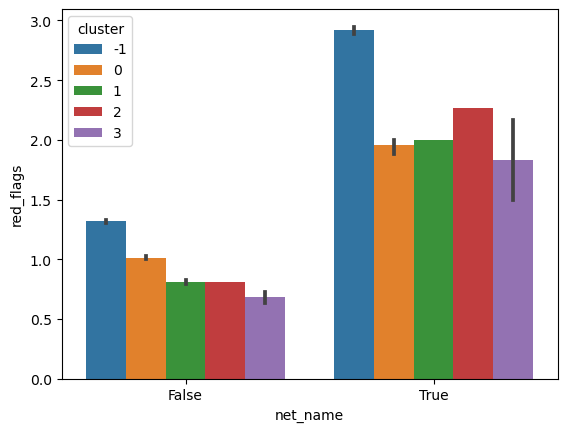

In [23]:
sns.barplot(hdb_100, x="net_name", y="red_flags", hue="cluster")

### Start: Brief analysis of first HDBSCAN model 

<Axes: xlabel='cluster', ylabel='proportion'>

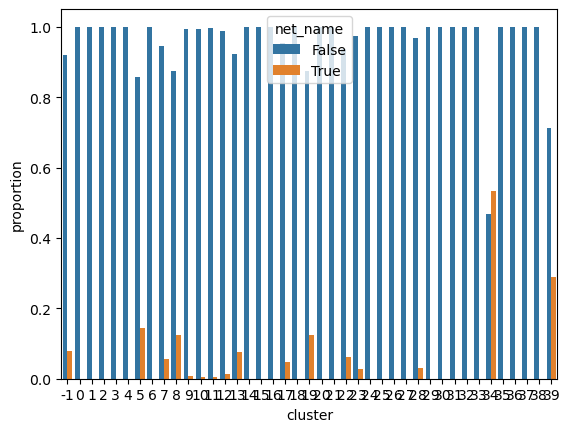

In [3]:
hdb3_nets = pd.DataFrame(hdb_new.groupby('cluster').net_name.value_counts(normalize = True))
hdb3_nets = hdb3_nets.reset_index()
sns.barplot(hdb3_nets, x="cluster", y="proportion", hue="net_name")

<Axes: xlabel='cluster', ylabel='proportion'>

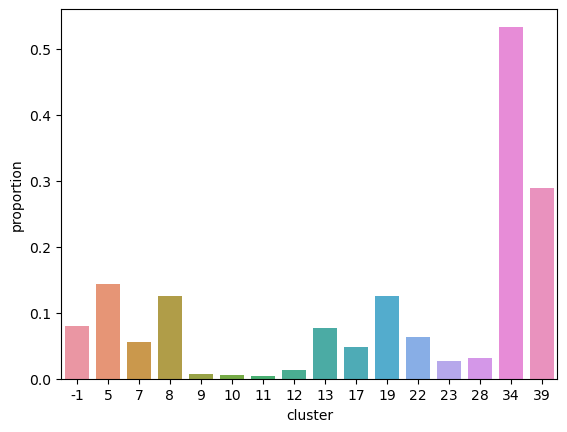

In [4]:
test = hdb3_nets.query("net_name == False & proportion == 1")
legals = test.cluster.unique()
test1 = hdb3_nets.query("net_name == True")
sns.barplot(test1, x="cluster", y="proportion")

In [5]:
test1.query("proportion> 0.5")

,cluster,net_name,proportion
49,34,True,0.533333


<Axes: xlabel='cluster', ylabel='proportion'>

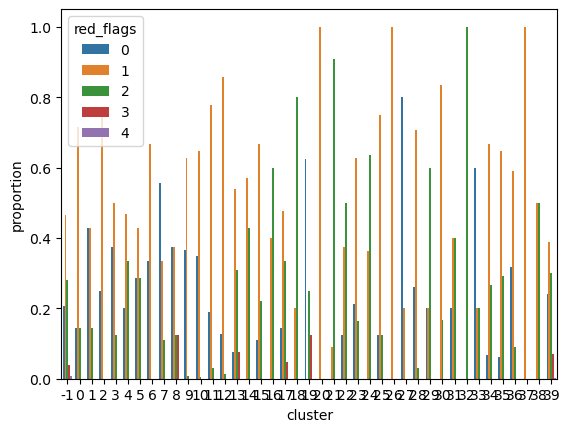

In [6]:
hdb3_flags = pd.DataFrame(hdb_new.groupby('cluster').red_flags.value_counts(normalize = True))
hdb3_flags = hdb3_flags.reset_index()
sns.barplot(hdb3_flags, x="cluster", y="proportion", hue="red_flags")

### Creating new_score to include in next iteration

In [ ]:
# Creating new column (new 'red flag' score), 'sus' represents new score that omitts net_name

In [7]:
hdb_new['sus'] = hdb_new['mmsi_length'].astype('int')+hdb_new['spawn_offshore'].astype('int')+hdb_new['spoof'].astype('int')
hdb_new.head()

,mmsi,occ_num,net_name,mmsi_length,spawn_offshore,spoof,speed_0,speed_med,speed_99,speed_std,...,x_99,x_std,y_0,y_med,y_99,y_std,red_flags,entries,cluster,sus
0,0,1,False,True,False,False,0.0,0.0,0.0,0.000000,...,0.133253,0.000000,0.651053,0.651053,0.651053,0.000000,1,5,39,1
1,0,2,True,True,True,False,4.2,6.9,9.6,3.818377,...,0.081572,0.030965,0.699434,0.835477,0.971519,0.192393,3,2,-1,2
2,0,3,False,True,True,False,0.0,0.0,0.0,0.000000,...,0.069601,0.000000,0.200804,0.200804,0.200804,0.000000,2,4,39,2
3,0,4,False,True,True,True,0.0,0.0,0.0,0.000000,...,0.133253,0.036749,0.200814,0.651043,0.651053,0.259943,3,3,-1,3
4,0,5,True,True,True,True,0.0,6.8,7.7,2.893832,...,0.401358,0.091522,0.200814,0.918348,0.969039,0.239350,4,30,-1,3


In [8]:
## Finding the average red_flag score for each cluster
avg = pd.DataFrame(hdb_new.groupby('cluster').red_flags.mean())
updated = hdb_new.copy()
avg = avg.reset_index()
avg.columns = ['cluster', 'avgflag']
avg.head()

,cluster,avgflag
0,-1,1.178479
1,0,1.000000
2,1,0.714286
3,2,0.750000
4,3,0.750000


In [9]:
## Creating new score -- Adding the mean red flag score of each cluster to each observation depending on which cluster it fell in
updated = updated.merge(avg, on='cluster', how = 'left')
updated['new_score'] = updated['red_flags'] + updated['avgflag']
updated.head()

,mmsi,occ_num,net_name,mmsi_length,spawn_offshore,spoof,speed_0,speed_med,speed_99,speed_std,...,y_0,y_med,y_99,y_std,red_flags,entries,cluster,sus,avgflag,new_score
0,0,1,False,True,False,False,0.0,0.0,0.0,0.000000,...,0.651053,0.651053,0.651053,0.000000,1,5,39,1,1.205144,2.205144
1,0,2,True,True,True,False,4.2,6.9,9.6,3.818377,...,0.699434,0.835477,0.971519,0.192393,3,2,-1,2,1.178479,4.178479
2,0,3,False,True,True,False,0.0,0.0,0.0,0.000000,...,0.200804,0.200804,0.200804,0.000000,2,4,39,2,1.205144,3.205144
3,0,4,False,True,True,True,0.0,0.0,0.0,0.000000,...,0.200814,0.651043,0.651053,0.259943,3,3,-1,3,1.178479,4.178479
4,0,5,True,True,True,True,0.0,6.8,7.7,2.893832,...,0.200814,0.918348,0.969039,0.239350,4,30,-1,3,1.178479,5.178479


### Running second iteration of HDBSCAN

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN

from sklearn.neighbors import NearestNeighbors
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# For upsampling during the modeling
from imblearn.over_sampling import SMOTE
from geopy.distance import geodesic
import re
import geopandas as gpd
import glob
from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import hdbscan
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.preprocessing import scale
from KmeansWithNulls import KmeansWithNulls

In [10]:
updated.head()

,mmsi,occ_num,net_name,mmsi_length,spawn_offshore,spoof,speed_0,speed_med,speed_99,speed_std,...,y_0,y_med,y_99,y_std,red_flags,entries,cluster,sus,avgflag,new_score
0,0,1,False,True,False,False,0.0,0.0,0.0,0.000000,...,0.651053,0.651053,0.651053,0.000000,1,5,39,1,0.916777,1.916777
1,0,2,True,True,True,False,4.2,6.9,9.6,3.818377,...,0.699434,0.835477,0.971519,0.192393,3,2,-1,2,1.099072,3.099072
2,0,3,False,True,True,False,0.0,0.0,0.0,0.000000,...,0.200804,0.200804,0.200804,0.000000,2,4,39,2,0.916777,2.916777
3,0,4,False,True,True,True,0.0,0.0,0.0,0.000000,...,0.200814,0.651043,0.651053,0.259943,3,3,-1,3,1.099072,4.099072
4,0,5,True,True,True,True,0.0,6.8,7.7,2.893832,...,0.200814,0.918348,0.969039,0.239350,4,30,-1,3,1.099072,4.099072


In [11]:
## Rerunning scaling
scaled_colum = ['speed_0',
       'speed_med', 'speed_99', 'speed_std', 'dist_med', 'dist_99', 'dist_std', 'new_score']
scaler = StandardScaler()
scaled_feats = updated.copy()

for i in scaled_colum:
    scaled_feats[i] = scale(scaled_feats[i])

scaled_feats = pd.DataFrame(scaled_feats, columns = updated.columns)
clust_feats = scaled_feats[['speed_0',
       'speed_med', 'speed_99', 'speed_std', 'dist_med', 'dist_99', 'dist_std',
       'x_0', 'x_med', 'x_99', 'x_std', 'y_0', 'y_med', 'y_99', 'y_std', 'new_score']]
clust_feats.head()  

,speed_0,speed_med,speed_99,speed_std,dist_med,dist_99,dist_std,x_0,x_med,x_99,x_std,y_0,y_med,y_99,y_std,new_score
0,-0.264238,-0.380418,-0.608081,-0.797178,-0.058250,-0.063238,-0.076438,0.133253,0.133253,0.133253,0.000000,0.651053,0.651053,0.651053,0.000000,-0.218887
1,0.239545,0.429431,0.378932,1.276807,0.269897,0.283699,0.729559,0.037781,0.059676,0.081572,0.030965,0.699434,0.835477,0.971519,0.192393,2.000553
2,-0.264238,-0.380418,-0.608081,-0.797178,-0.058250,-0.063238,-0.076438,0.069601,0.069601,0.069601,0.000000,0.200804,0.200804,0.200804,0.000000,0.905828
3,-0.264238,-0.380418,-0.608081,-0.797178,1.025515,0.509685,1.010310,0.069601,0.133253,0.133253,0.036749,0.200814,0.651043,0.651053,0.259943,2.000553
4,-0.264238,0.417694,0.183586,0.774633,0.620295,5.058441,7.032474,0.069601,0.397178,0.401358,0.091522,0.200814,0.918348,0.969039,0.239350,3.125268


In [12]:
## Running second iteration of HDBSCAN with adjustments and new parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size = 100,cluster_selection_epsilon = 0.5).fit_predict(clust_feats)

In [13]:
# Saving results
cluster_dict=[]
for c in clusterer:
    cluster_dict.append(c)


# adds the cluster information as a column in the df
updated['new_clust'] = cluster_dict


### Analyzing Results

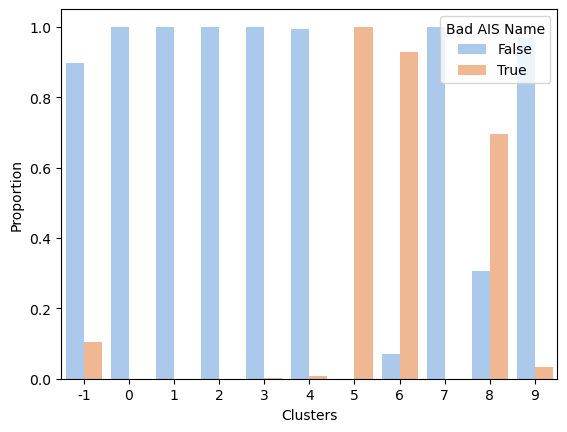

In [15]:
## Cross referencing the resulting clusters by whether they have a bad vessel name or not

new = pd.DataFrame(updated.groupby('new_clust').net_name.value_counts(normalize=True))
new = new.reset_index()
sns.set_palette("pastel")
sns.barplot(new, x="new_clust", y="proportion", hue="net_name")
plt.xlabel('Clusters')
plt.ylabel('Proportion')
plt.legend(title = 'Bad AIS Name')


In [27]:
# Showing the variational density differences per cluster
range = pd.DataFrame(updated.groupby('new_clust').net_name.value_counts())
range

count
new_clust net_name       
-1        False      2999
          True        345
 0        False       143
 1        False      1245
 2        False       289
 3        False       571
          True          1
 4        False       269
          True          2
 5        True        162
 6        True      13918
          False      1057
 7        False     50631
 8        True      44227
          False     19415
 9        False     79575
          True       2707

In [28]:
range.query("net_name == True").sum()

count    61362
dtype: int64

In [30]:
range.query("net_name == False").sum()

count    156194
dtype: int64

In [33]:
#Percentage of bad net_names captured in clusters 5, 6, and 8
((162+13918+44227) / (345+1+2+162+13918+44227+2707))*100

95.02134871744728

In [32]:
#Proportion of trips in dataset with bad net_name
61362/156194 

0.39285760016389876

In [40]:
#Query for the primary clusters with good vessel names
goodnames = updated.query("new_clust == [5,6,8] & net_name == False")
goodnames

,mmsi,occ_num,net_name,mmsi_length,spawn_offshore,spoof,speed_0,speed_med,speed_99,speed_std,...,y_med,y_99,y_std,red_flags,entries,cluster,sus,avgflag,new_score,new_clust
2,0,3,False,True,True,False,0.0,0.00,0.0,0.000000,...,0.200804,0.200804,0.000000,2,4,39,2,1.205144,3.205144,8
5,0,6,False,True,True,True,0.0,0.20,12.7,5.129494,...,0.940429,0.959619,0.013066,3,22,39,3,1.205144,4.205144,6
7,0,8,False,True,True,False,5.3,9.05,10.1,1.843638,...,0.991570,0.992140,0.000457,2,6,39,2,1.205144,3.205144,8
14,2,2,False,True,True,False,0.8,0.80,0.8,1.467670,...,0.510470,0.510470,0.007414,2,1,39,2,1.205144,3.205144,8
15,2,3,False,True,True,False,1.7,1.70,1.7,1.467670,...,0.510480,0.510480,0.007414,2,1,39,2,1.205144,3.205144,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217550,1073741822,4,False,True,True,False,1.4,1.40,1.4,0.000000,...,0.938439,0.938439,0.000000,2,2,39,2,1.205144,3.205144,8
217551,1073741823,1,False,True,True,False,1.0,1.30,2.1,0.491935,...,0.723334,0.724334,0.000792,2,5,39,2,1.205144,3.205144,8
217553,1073741823,3,False,True,True,False,1.4,1.70,2.2,0.380789,...,0.721684,0.721964,0.000353,2,5,39,2,1.205144,3.205144,8
217554,1073741823,4,False,True,True,False,0.8,0.80,4.4,1.039230,...,0.731735,0.731735,0.000121,2,12,39,2,1.205144,3.205144,8


In [55]:
#List of unique MMSIs in primary clusters but have good vessel names
good_mmsi_list = pd.DataFrame(goodnames.mmsi.unique())
good_mmsi_list.columns = ["MMSI"]
good_mmsi_list

,MMSI
0,0
1,2
2,9
3,33
4,41
...,...
13306,1073676288
13307,1073740544
13308,1073741568
13309,1073741822


In [45]:
#Note that unique list is almost half, indicating that several MMSIs had multiple trips in the dataset
len(good_mmsi_list)

13311

In [51]:
good_mmsi_list.to_csv('cluster_mmsi_list.csv', index=False)

In [71]:
updated.to_csv('final_HDBSCAN_results.csv', index=False)
